(176, 208, 176, 1)
NZ:  1667264
out of  6443008
NZ in procent:  25.8771058487
max value  3216
r =  18 154
c =  18 188
z =  7 151
NZ:  1667264
out of  3896064
NZ in procent:  42.7935475393
max value  3216


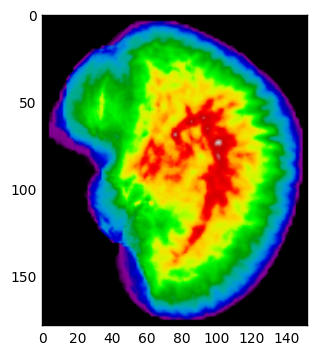

img2d size:  (144, 178)
imgCUT2d size:  (48, 59)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:61: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


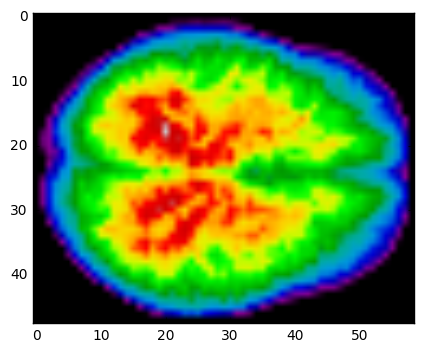

img2d size:  (144, 178)
imgCUT2d size:  (72, 89)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:88: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


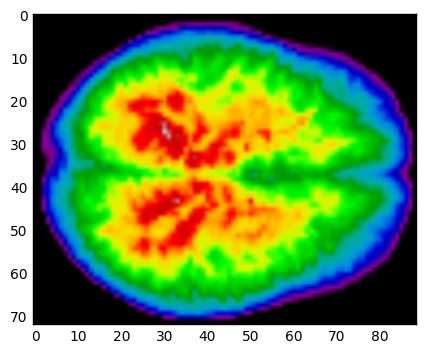

In [31]:
%matplotlib inline
from __future__ import division
import os
import numpy as np
import nibabel as nib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_path = '/home/igor/ML/project1/set_train/'
proj_path = '/home/igor/ML/project1/'
example_filename = os.path.join(data_path, 'train_2.nii')

img = nib.load(example_filename).get_data()

print img.shape #(176, 208, 176, 1)

nz = np.count_nonzero(img)
total = img.shape[0] * img.shape[1] * img.shape[2]
print 'NZ: ', nz
print 'out of ', total
print 'NZ in procent: ', 100 * nz / total
print 'max value ', np.amax(img) 

r = np.any(img, axis=(1, 2))
c = np.any(img, axis=(0, 2))
z = np.any(img, axis=(0, 1))

rmin, rmax = np.where(r)[0][[0, -1]]
cmin, cmax = np.where(c)[0][[0, -1]]
zmin, zmax = np.where(z)[0][[0, -1]]

print 'r = ', rmin, rmax
print 'c = ', cmin, cmax
print 'z = ', zmin, zmax

img = np.sum(img, axis=3)     # to remove the '4th' dimension which is basically intesity

offset = 4
img = img[rmin-offset:rmax+offset,cmin-offset:cmax+offset,zmin-offset:zmax+offset]

nz = np.count_nonzero(img)
total = img.shape[0] * img.shape[1] * img.shape[2]
print 'NZ: ', nz
print 'out of ', total
print 'NZ in procent: ', 100 * nz / total
print 'max value ', np.amax(img) 



imgplot0 = plt.imshow(np.sum(img, axis=0), cmap="spectral")     # sa strane
#imgplot1 = plt.imshow(np.sum(img, axis=1), cmap="spectral")    # od pozadi
#imgplot2 = plt.imshow(np.sum(img, axis=2), cmap="spectral")   # od gore
plt.show()


img2d = np.sum(img, axis=2)
print 'img2d size: ', img2d.shape
iEdge = img2d.shape[0] % 3
jEdge = img2d.shape[1] % 3
imgCUT2d = np.zeros(((img2d.shape[0] - iEdge)/3, (img2d.shape[1] - jEdge)/3))
print 'imgCUT2d size: ', imgCUT2d.shape
countI = -1
#countJ = -1
for i in range(img2d.shape[0]):
    if i % 3 == 1 and i < img2d.shape[0] - iEdge - 2:
        countI += 1
        countJ = -1
        for j in range(img2d.shape[1]):
            if j % 3 == 1 and j < img2d.shape[1] - jEdge -2:
                countJ +=1
                result = np.sum(img2d[i-1:i+1,j-1:j+1]) / 9
                #try:
                imgCUT2d[countI][countJ] = result
                #print 'countI, countJ = ', countI,' ', countJ
                #except IndexError:
                    #print i, j 
                    
imgplot2CUT = plt.imshow(imgCUT2d, cmap="spectral")   # od gore
plt.show()



img2d = np.sum(img, axis=2)
print 'img2d size: ', img2d.shape
iEdge = img2d.shape[0] % 2
jEdge = img2d.shape[1] % 2
imgCUT2d = np.zeros(((img2d.shape[0] - iEdge)/2, (img2d.shape[1] - jEdge)/2))
print 'imgCUT2d size: ', imgCUT2d.shape
countI = -1
#countJ = -1
for i in range(img2d.shape[0]):
    if i % 2 == 1 and i < img2d.shape[0] - iEdge - 1:
        countI += 1
        countJ = -1
        for j in range(img2d.shape[1]):
            if j % 2 == 1 and j < img2d.shape[1] - jEdge -1:
                countJ +=1
                result = np.sum(img2d[i-1:i,j-1:j]) / 4
                #try:
                imgCUT2d[countI][countJ] = result
                #print 'countI, countJ = ', countI,' ', countJ
                #except IndexError:
                    #print i, j 
                    
imgplot2CUT = plt.imshow(imgCUT2d, cmap="spectral")   # od gore
plt.show()

targets_file = open(os.path.join(proj_path, 'targets.csv'), 'r')

for i in range(1,50):
	img_file = os.path.join(data_path, 'train_'+str(i)+'.nii')

	img = nib.load(img_file)

	age = targets_file.readline()

	#print age



In [30]:
%matplotlib inline
from __future__ import division
import os
import numpy as np
import nibabel as nib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_path = '/home/igor/ML/project1/set_train/'
proj_path = '/home/igor/ML/project1/'
example_filename = os.path.join(data_path, 'train_2.nii')

img = nib.load(example_filename).get_data()

print img.shape #(176, 208, 176, 1)

nz = np.count_nonzero(img)
total = img.shape[0] * img.shape[1] * img.shape[2]
print 'NZ: ', nz
print 'out of ', total
print 'NZ in procent: ', 100 * nz / total
print 'max value ', np.amax(img) 

r = np.any(img, axis=(1, 2))
c = np.any(img, axis=(0, 2))
z = np.any(img, axis=(0, 1))

rmin, rmax = np.where(r)[0][[0, -1]]
cmin, cmax = np.where(c)[0][[0, -1]]
zmin, zmax = np.where(z)[0][[0, -1]]

print 'r = ', rmin, rmax
print 'c = ', cmin, cmax
print 'z = ', zmin, zmax

img = np.sum(img, axis=3)     # to remove the '4th' dimension which is basically intesity

# crop the image with given offset
offset = 4
img = img[rmin-offset:rmax+offset,cmin-offset:cmax+offset,zmin-offset:zmax+offset]




#img2d = np.sum(img, axis=2)
print 'img size: ', img2d.shape
iEdge = img.shape[0] % 2
jEdge = img.shape[1] % 2
kEdge = img.shape[2] % 2
imgCUT = np.zeros(((img.shape[0] - iEdge)/2, (img.shape[1] - jEdge)/2, (img.shape[2] - kEdge)/2))
print 'imgCUT size: ', imgCUT.shape
countI = -1
#countJ = -1
for i in range(img.shape[0]):
    if i % 2 == 1 and i < img.shape[0] - iEdge - 1:
        countI += 1
        countJ = -1
        for j in range(img.shape[1]):
            if j % 2 == 1 and j < img.shape[1] - jEdge -1:
                countJ +=1
                countK = -1
                for k in range(img.shape[2]):
                    if k % 2 == 1 and k < img.shape[2] - kEdge -1:
                        countK +=1
                        result = np.sum(img[i-1:i, j-1:j, k-1:k]) / 8
                        imgCUT[countI][countJ][countK] = result
                        
                        
nz = np.count_nonzero(imgCUT)
total = imgCUT.shape[0] * imgCUT.shape[1] * imgCUT.shape[2]
print 'NZ: ', nz
print 'out of ', total
print 'NZ in procent: ', 100 * nz / total

(176, 208, 176, 1)
NZ:  1667264
out of  6443008
NZ in procent:  25.8771058487
max value  3216
r =  18 154
c =  18 188
z =  7 151
img size:  (144, 178)
imgCUT size:  (72, 89, 76)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:51: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


NZ:  212197
out of  487008
NZ in procent:  43.5715635061
